In [1]:
import cf_xarray
import gribberish
import xarray as xr

## Reading a Dataset

The `gribberish` engine can be used to read a grib2 file into a dataset.

In [2]:
ds = xr.open_dataset('gfswave.20210826.t12z.atlocn.0p16.f000.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:  (time: 1, latitude: 331, longitude: 301, lat: 331, lon: 301, seq: 3)
Coordinates:
  * lat      (lat) float64 55.0 54.83 54.67 54.5 ... 0.3332 0.1666 -0.00011
  * lon      (lon) float64 260.0 260.2 260.3 260.5 ... 309.5 309.7 309.8 310.0
  * time     (time) datetime64[ns] 2021-08-26T08:00:00
  * seq      (seq) int64 1 2 3
Dimensions without coordinates: latitude, longitude
Data variables:
    HTSGW    (time, latitude, longitude) float64 ...
    WVHGT    (time, latitude, longitude) float64 ...
    VGRD     (time, latitude, longitude) float64 ...
    WDIR     (time, latitude, longitude) float64 ...
    UGRD     (time, latitude, longitude) float64 ...
    PERPW    (time, latitude, longitude) float64 ...
    DIRPW    (time, latitude, longitude) float64 ...
    WVDIR    (time, latitude, longitude) float64 ...
    WIND     (time, latitude, longitude) float64 ...
    WVPER    (time, latitude, longitude) float64 ...
Attributes:
    meta:     created with gribberish

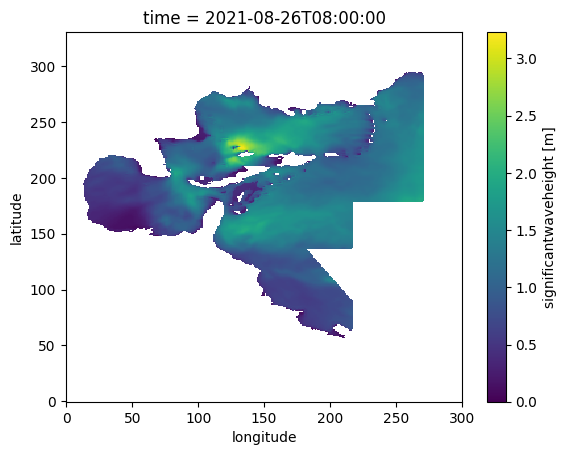

In [4]:
%matplotlib inline

ds['HTSGW'].plot()